In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [383]:
df = pd.read_csv("/content/drive/MyDrive/campus x /Capstone Project /gurgaon_properties_cleaned_v2.csv")

In [384]:
df.duplicated().sum()

3

In [385]:
df.drop_duplicates(inplace = True)

In [386]:
df.shape

(3805, 23)

In [387]:
df.head(2)

,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area,...,floorNum,facing,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score
0,ireo victory valley,2.99,sector 67,11832.0,2527.0,flat,Super Built up area 2527(234.77 sq.m.)Built Up...,2527.040803,2200.0,2100.0,...,4.0,East,relatively new,1,0,0,0,0,0,37.0
1,signature global park,0.58,sohna road,7056.0,822.0,flat,Built Up area: 822 (76.37 sq.m.)Carpet area: 6...,NaN,822.0,600.0,...,3.0,NaN,undefined,0,0,0,0,0,1,58.0


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 3807
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   society              3316 non-null   object 
 1   price                3787 non-null   float64
 2   sector               3805 non-null   object 
 3   price_per_sqft       3787 non-null   float64
 4   area                 3787 non-null   float64
 5   property_type        3805 non-null   object 
 6   areaWithType         3805 non-null   object 
 7   super_built_up_area  1911 non-null   float64
 8   built_up_area        1170 non-null   float64
 9   carpet_area          1911 non-null   float64
 10  bedRoom              3805 non-null   float64
 11  bathroom             3805 non-null   float64
 12  balcony              3805 non-null   object 
 13  floorNum             3786 non-null   float64
 14  facing               2697 non-null   object 
 15  agePossession        3805 non-null   o

#property_type

In [389]:
df['property_type'].isnull().sum()

0

In [390]:
(df['property_type'].value_counts()/df.shape[0])*100

flat     77.240473
house    22.759527
Name: property_type, dtype: float64

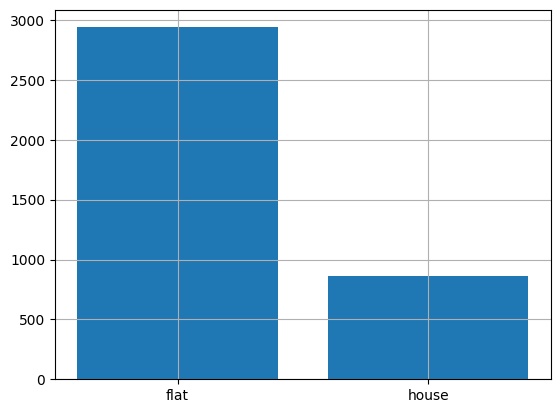

In [391]:
plt.bar(df['property_type'].value_counts().index, df['property_type'].value_counts().values)
plt.grid()

Observations:


*   Flats are present in majority i.e 77% and houses are ~23% in dataset
*   No missing values in dataset



#society

In [392]:
df['society'].value_counts().shape

(676,)

In [393]:
df['society'].value_counts()

tulip violet                            75
ss the leaf                             74
shapoorji pallonji joyville gurugram    45
dlf new town heights                    42
signature global park                   37
                                        ..
park view apartments                     1
ansal celebrity homes                    1
grover homes sec 4                       1
laxmi pareena                            1
navjyoti apartment                       1
Name: society, Length: 676, dtype: int64

In [394]:
#all the nan values in society has property type value as 'house'(not fla) since house will not be the part of any society we will fill nana values in socity with independent
df['society'].fillna('independent', inplace =True)

In [395]:
(df['society'].value_counts() / df['society'].shape[0])*100

independent                             12.851511
tulip violet                             1.971091
ss the leaf                              1.944809
shapoorji pallonji joyville gurugram     1.182654
dlf new town heights                     1.103811
                                          ...    
park view apartments                     0.026281
ansal celebrity homes                    0.026281
grover homes sec 4                       0.026281
laxmi pareena                            0.026281
navjyoti apartment                       0.026281
Name: society, Length: 677, dtype: float64

In [396]:
df['society'][df['society']!='independent'].value_counts().shape

(676,)

In [397]:
df['society'][df['society']!='independent'].value_counts(normalize = True).cumsum().head(75)

tulip violet                            0.022618
ss the leaf                             0.044934
shapoorji pallonji joyville gurugram    0.058504
dlf new town heights                    0.071170
signature global park                   0.082328
                                          ...   
dlf the primus                          0.484922
puri diplomatic greens                  0.489144
the close north                         0.493366
puri emerald bay                        0.497286
unitech uniworld resorts                0.501206
Name: society, Length: 75, dtype: float64

we can see top 75 socities has 50% of flats or society in the data

In [398]:
#creating frequency bins

frequecy_count = df['society'].value_counts()
frequency_bins = {'very_high (>100)' : sum(frequecy_count>100),
 'High (50-100)': sum((frequecy_count<=100) & (frequecy_count>=50)),
 'average (10-49)':  sum((frequecy_count<=49) & (frequecy_count>=10)),
 'low (2-9)'  : sum((frequecy_count<=9) & (frequecy_count>=2)),
 'very_low(1)': sum(frequecy_count==1)
}

In [399]:
frequency_bins

{'very_high (>100)': 1,
 'High (50-100)': 2,
 'average (10-49)': 97,
 'low (2-9)': 287,
 'very_low(1)': 290}

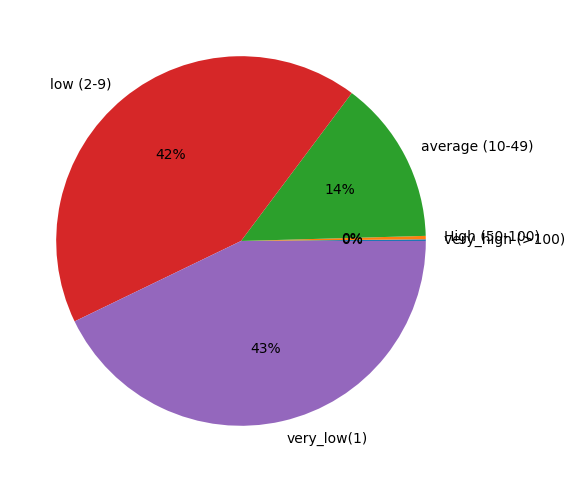

In [400]:
plt.figure(figsize = (6,6))
plt.pie(frequency_bins.values(), labels = frequency_bins.keys(), autopct = "%1.0f%%")
#plt.legend()
plt.show()

* Their is only one society which has more than 100 properties in data
* Their are 2 societies which has total number of properties between 50 to 100 in data
* Their are 97 societies which has prooperties between 10 to 49
* Their are 287 societies which has total properties in dataset is 287
* there are 290 scociety which has only one flat or house in dataset


<Axes: >

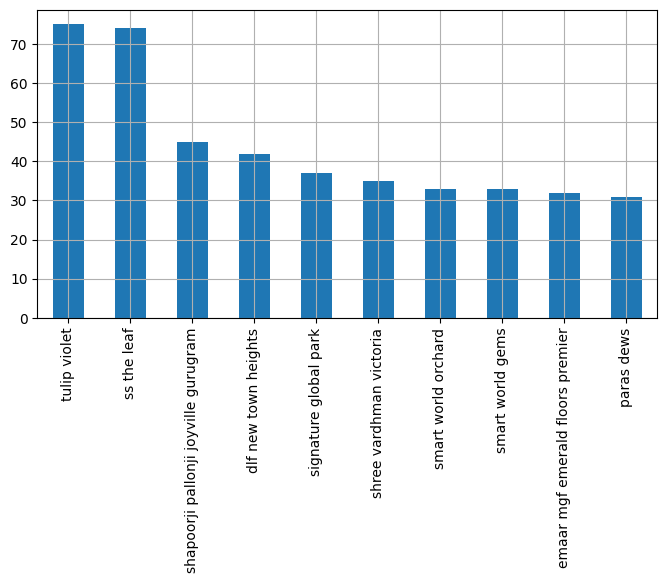

In [401]:
plt.figure(figsize = (8,4))
df['society'][df['society']!='independent'].value_counts().head(10).plot(kind = 'bar', grid = True)

* 13% of properties comes under independent tag
* There are total 676 societies out of which top 75 societies has 50% of properties and remaining  50% properties are belonging to rest of 601 societies


#Sector

In [402]:
df['sector'].value_counts().shape

(116,)

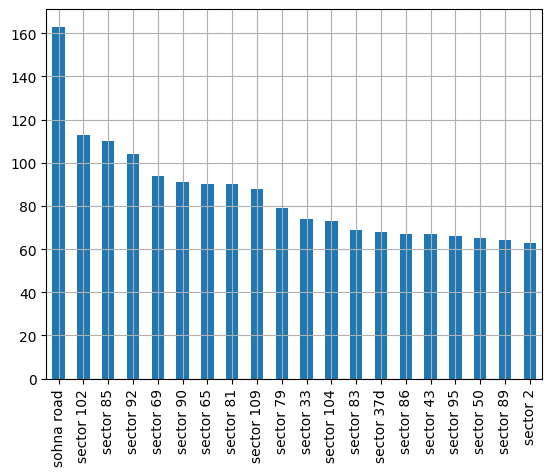

In [403]:
df['sector'].value_counts().head(20).plot(kind = 'bar')
plt.grid()

In [404]:

sector_frequency = {'very_high(>100)':sum(df['sector'].value_counts()>100),
'high(50-100)' :sum((df['sector'].value_counts()>=50) & (df['sector'].value_counts()<=100)),
'average(10-50)' : sum((df['sector'].value_counts()>=10) & (df['sector'].value_counts()<50)),
'low(2-10)' : sum((df['sector'].value_counts()>=2) & (df['sector'].value_counts()<9)),
'very_low(1)' :sum(df['sector'].value_counts()==1)}

In [405]:
sector_frequency

{'very_high(>100)': 4,
 'high(50-100)': 25,
 'average(10-50)': 62,
 'low(2-10)': 22,
 'very_low(1)': 1}

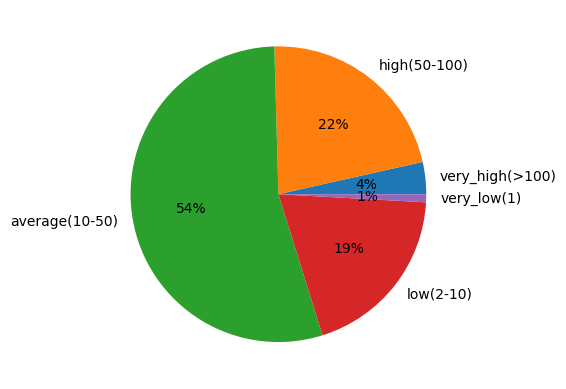

In [406]:
plt.pie(sector_frequency.values(), labels = sector_frequency.keys(), autopct = '%1.0f%%')
plt.show()

* There are total 116 uniqe sectors present
* very_high(>100) : 4 sectors have more than 100 listing
* high(50-100) : 25 sectors have listing between 50 and 100
* average(10-50) : 62 sectors have listing between 10 to 50
* low(2-10) : 22 sectors have listing between 2 to 10
* very_low(1) : one sector hae only one listing

#Price

In [407]:
df['price'].isnull().sum()

18

In [408]:
df['price'].describe()

count    3787.000000
mean        2.506932
std         2.949164
min         0.070000
25%         0.940000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

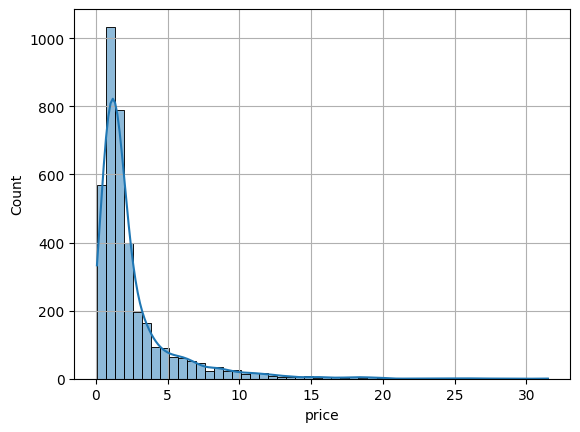

In [409]:
sns.histplot(df['price'], kde = True, bins = 50)
plt.grid()

In [410]:
df['price'].skew()

3.3117772167227293

In [411]:
df['price'].kurt()

15.26672462810172

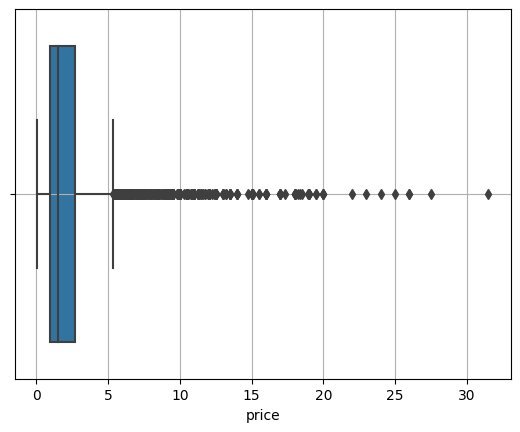

In [412]:
sns.boxplot(x = df['price'])
plt.grid()
plt.show()

* There are total 18 missing values in price column
* The average price of property in Gurgaon is 2.5cr and median value is 1.5cr  which indicates the skewness.
* std is 2.9 cr which indicates very high variance in price
* min value of property is 7lakh
and max value of property is 31.5cr which indicates ouliers present in data.
* IQR i.e (25 percentile to 75 percentile) is from 94lak to 2.7cr

##Visualization :
* We can see in hisplot most of the properties have price below 5 cr and very few properties have price above 5cr.also data is higly skewed towords right indicating outliers in data
*Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
*kurtosis is 15.26 which is greater than 3 indicates the distribution with heavier tail and and more outliers compare to normal distribution.





#Quantile Analysis

In [413]:
df['price'].quantile([0.01,0.5,0.95,0.99])

0.01     0.250
0.50     1.500
0.95     8.490
0.99    15.014
Name: price, dtype: float64

* 1% Quantile : only 1% of properties has price below 0.25 cr
* 95% Quantile : 95% of properties has price below 8.49 cr
* 99% Quantile : 99% of properties has price below 15 cr

In [414]:
#potential outliers
df['price'].describe()

count    3787.000000
mean        2.506932
std         2.949164
min         0.070000
25%         0.940000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

In [415]:
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']

In [416]:
IQR = Q3-Q1

In [417]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [418]:
lower, upper

(-1.7000000000000006, 5.340000000000001)

In [419]:
outliers = df[(df['price'] < lower) | (df['price']>=upper)]

In [420]:
outliers.shape

(432, 23)

In [421]:
outliers['price'].describe()

count    432.000000
mean       9.196157
std        4.061291
min        5.350000
25%        6.400000
50%        8.000000
75%       10.607500
max       31.500000
Name: price, dtype: float64

* There are total 432 utliers are present in data
* average price of outliers is 9.1 cr
* the range of outliers is 5.35cr to 31.5cr

<Axes: >

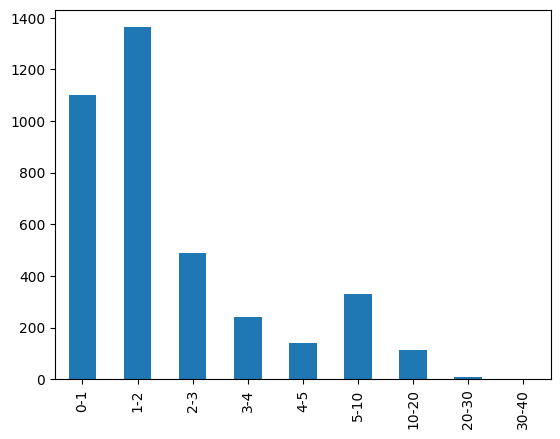

In [422]:
#price binning
bins = [0,1,2,3,4,5,10,20,30,40]
bins_label = ['0-1','1-2','2-3', '3-4', '4-5', '5-10', '10-20', '20-30', '30-40']
pd.cut(df['price'], bins = bins, right = True, labels = bins_label).value_counts().sort_index().plot(kind = 'bar')

Majority of the properties have a price between 0 to 2 crore. we can see this using ecdf plot as shown below

In [423]:
#ECDF PLOT
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])

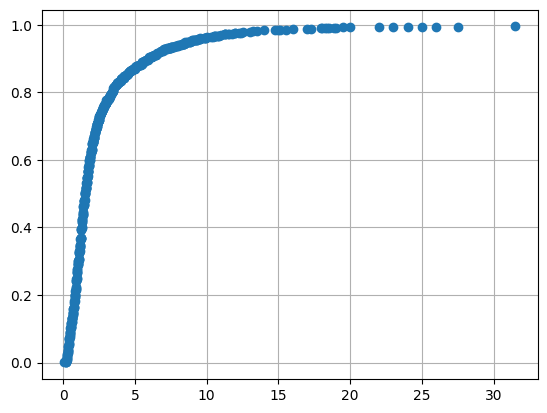

In [424]:
plt.plot(ecdf.index, ecdf, marker = 'o', linestyle = 'none')
plt.grid()

Text(0.5, 1.0, 'after transformation')

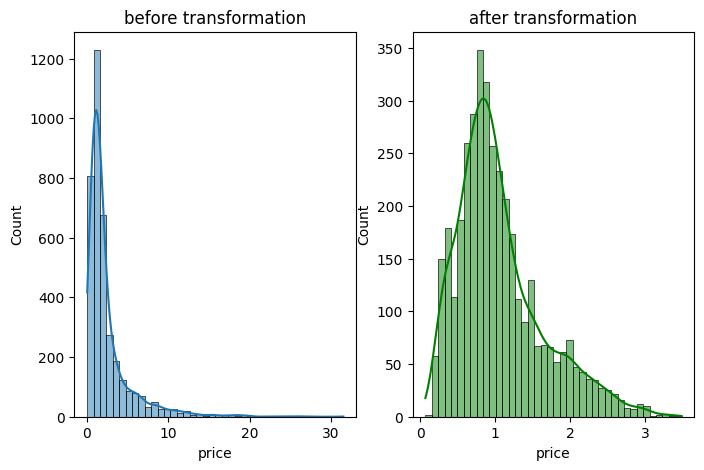

In [425]:
#since the distribution was skewed we need to use some transformation to make it normal
plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
sns.histplot(df['price'], kde = True, bins = 40)
plt.title('before transformation')

plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price']), kde = True, bins = 40, color = 'green')
plt.title('after transformation')

np.log1p : This function is designed in a such awaya that it can handle the zero values appropriately. log function represents the value in the form of power of 10 (if base is 10). example log(100) is 2 and log(1000) is 3. It is difficult to compare 100 and 1000 on a same scale but we can compare 2 and 3 easily on same scale.

In [426]:
print(f"skewness : {np.log1p(df['price']).skew()}")
print(f"kurtosis : {np.log1p(df['price']).kurt()}")

skewness : 1.0814029216790844
kurtosis : 1.005311501469838


we can see skewness and kurtosis has been reduce after applyiing log transformation

Text(0.5, 1.0, 'Distribution price (transformed)')

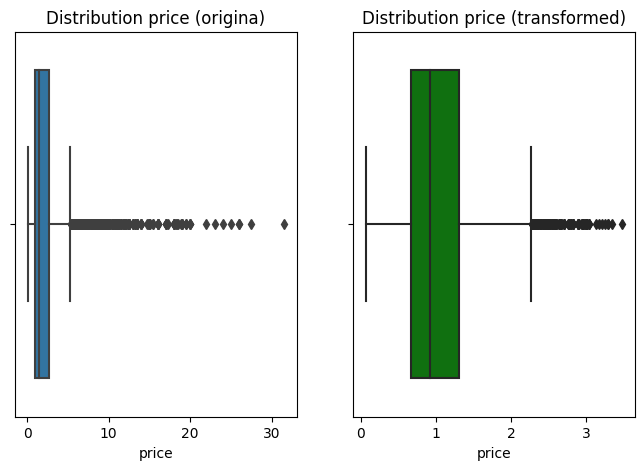

In [427]:
plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['price'])
plt.title('Distribution price (origina)')

plt.subplot(1,2,2)
sns.boxplot(x = np.log1p(df['price']), color = 'green')
plt.title('Distribution price (transformed)')

#price_per_sqft

In [428]:
df['price_per_sqft'].isna().sum()

18

In [429]:
df['price_per_sqft'].describe()

count      3787.000000
mean      13801.131503
std       23045.602131
min           4.000000
25%        6811.000000
50%        9000.000000
75%       13767.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

* The standard deviaton is very high 23045 indicating very high variance in the data
* min price_per_sqft is 4 rs and max price is 600000 which is abnormal and indicating thr potential outliers on both higher and lower side.


<Axes: xlabel='price_per_sqft', ylabel='Count'>

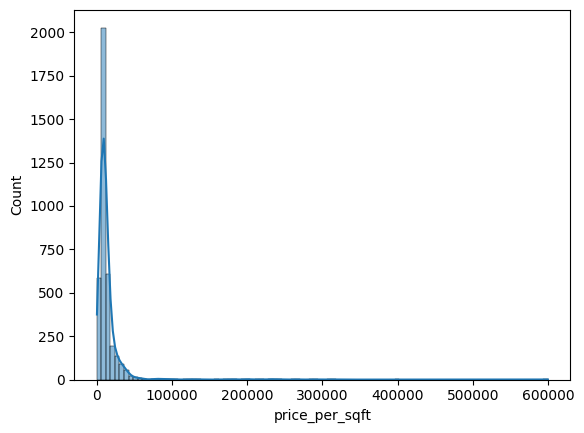

In [430]:
sns.histplot(df['price_per_sqft'], kde = True, bins = 100)

In [431]:
print(f"skewnes : {df['price_per_sqft'].skew()}")
print(f"kurtosis : {df['price_per_sqft'].kurt()}")

skewnes : 11.442594918461419
kurtosis : 187.1505923768637


we can see the distribution of data is very highly right skewed
also the kurtosis is very high i.e 187 which indicates very heavy tail(i.e more outliers)

<Axes: >

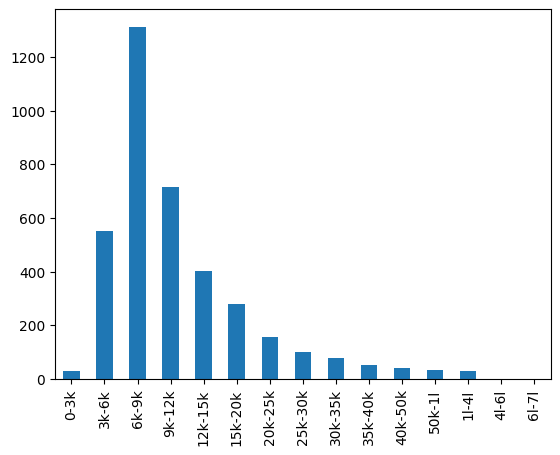

In [432]:
bins = [0,3000,6000,9000,12000,15000,20000,25000, 30000,35000, 40000, 50000,100000,400000,600000,700000]
bin_label = ['0-3k', '3k-6k', '6k-9k', '9k-12k', '12k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k', '35k-40k' , '40k-50k','50k-1l', '1l-4l', '4l-6l', '6l-7l']
pd.cut(df['price_per_sqft'], bins = bins, labels = bin_label).value_counts().sort_index().plot(kind = 'bar')

we can see majority of the properties have price_per_sqft between 6000 to 12000 rs

<Axes: xlabel='price_per_sqft'>

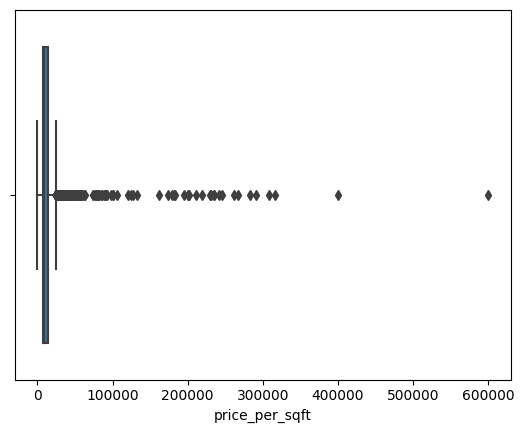

In [433]:
sns.boxplot(x = df['price_per_sqft'])

Box distrinbution shows the outliers present in dataset

##Quantile Analysis

In [434]:
df['price_per_sqft'].quantile([0.01,0.1,0.25,0.5,0.75,0.8,0.9,0.99,0.99999])

0.01000      3321.04
0.10000      5463.00
0.25000      6811.00
0.50000      9000.00
0.75000     13767.00
0.80000     15195.00
0.90000     23695.40
0.99000     84359.38
0.99999    592428.00
Name: price_per_sqft, dtype: float64

* 1 percentile : only 1% of the properties have price per sqft below 3321
* 80 percentile : 80% of the properties have price per sqft below than 15195
* 90 percentile : 90 % of proerties have price per sqft below 23695

In [435]:
#Upper quantile
Q1 = df['price_per_sqft'].describe()['25%']
#Lower quantile
Q3 = df['price_per_sqft'].describe()['75%']
#IQR
iqr = Q3 - Q1
#Lower
lower = Q1 - 1.5*iqr
upper = Q3 + 1.5*iqr

In [436]:
outliers = df[(df['price_per_sqft'] < lower) | (df['price_per_sqft'] > upper)]

In [437]:
outliers['price_per_sqft'].describe()

count       367.000000
mean      52115.435967
std       60746.225927
min       24202.000000
25%       27778.000000
50%       33333.000000
75%       41790.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [438]:
lower

-3623.0

**Outlier analysis using iqr methode**
* There are total 367 outliers
* The outliers have average price 52115
* range of the outliers is 24202 to 600000

Text(0.5, 1.0, 'price_per_sqft distribution (transformed)')

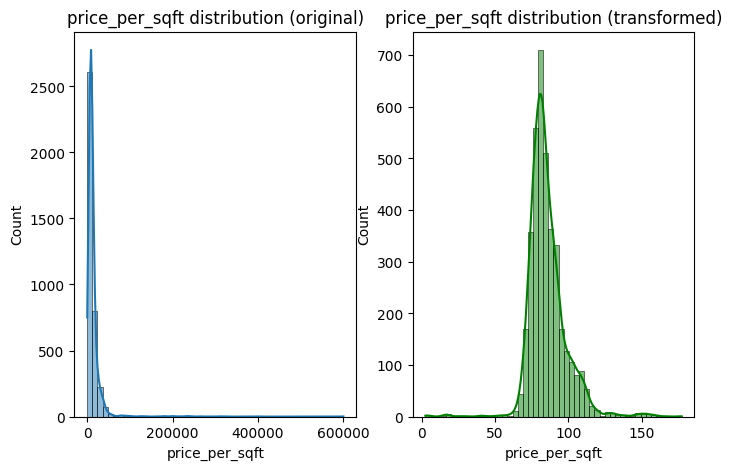

In [439]:
plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
sns.histplot(df['price_per_sqft'], kde = True, bins = 50)
plt.title('price_per_sqft distribution (original)')

plt.subplot(1,2,2)
sns.histplot(np.square(np.log1p(df['price_per_sqft'])), kde = True, bins = 50, color = 'green')
plt.title('price_per_sqft distribution (transformed)')

In [440]:
print(f"skewness after transformation : {np.square(np.log1p(df['price_per_sqft'])).skew()}")
print(f"kurtosis after transformation : {np.square(np.log1p(df['price_per_sqft'])).kurt()}")

skewness after transformation : 0.993739073847023
kurtosis after transformation : 8.381807643704954


* we applay log1p transformation which cause the distribution to become left skew. so to avoid this we applied square transformation on top of log1p. due to which now the distribution is almost normal

* kurtosis is stiill > 3 i.e still outliers are present in data

Text(0.5, 1.0, 'price_per_sqft distribution (transformed)')

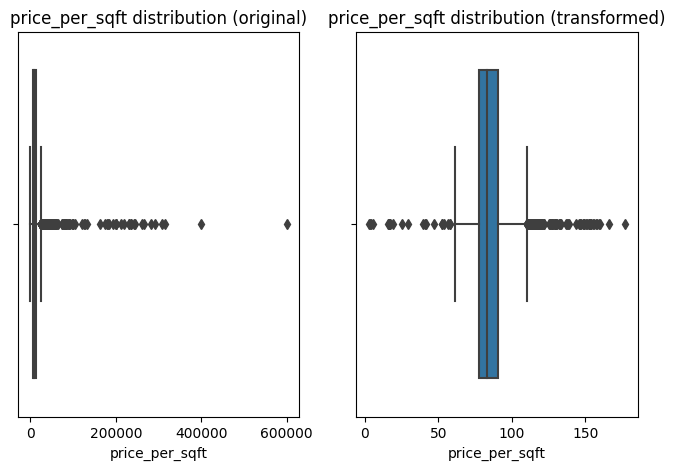

In [441]:
plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['price_per_sqft'])
plt.title('price_per_sqft distribution (original)')

plt.subplot(1,2,2)
sns.boxplot(x = np.square(np.log1p(df['price_per_sqft'])))
plt.title('price_per_sqft distribution (transformed)')

##Observation
* 18 missing values
* min price_per_sqft 4 rs and max price is 600000 which is abnormal and indicating thr potential outliers on both higher and lower side in dataset.
* The distribution of data is very highly right skewed i.e 11 also the kurtosis is very high i.e 187 which indicates very heavy tail(i.e more outliers)
* Majority of the properties have price_per_sqft between 6000 to 12000 rs
* There are total 367 outliers
* The outliers have average price 52115
* range of the outliers is 24202 to 600000
* apply square transformation on top of log1p to make distribution normal
* outliers present on both upper and lower side in box plot dist even after applying transformation

#bedRoom

<Axes: >

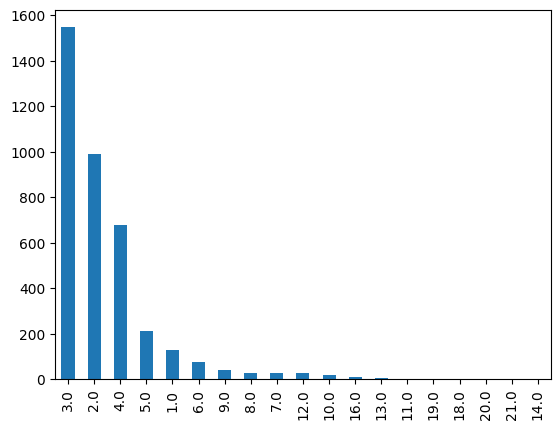

In [442]:
df['bedRoom'].value_counts().plot(kind = 'bar')

In [443]:
df['bedRoom'].isna().sum()

0

<Axes: ylabel='bedRoom'>

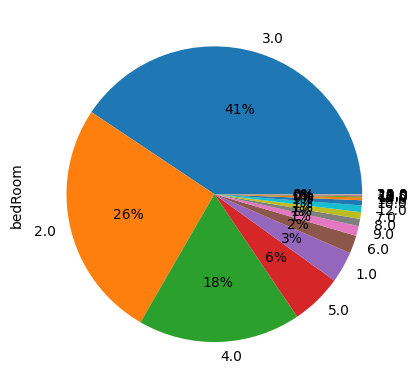

In [444]:
df['bedRoom'].value_counts().plot(kind = 'pie', autopct = '%1.0f%%')

* There are around 41% flats are 3bhk followed by 26% 2bhk and 18% 4 bhk

#Bathroom

<Axes: >

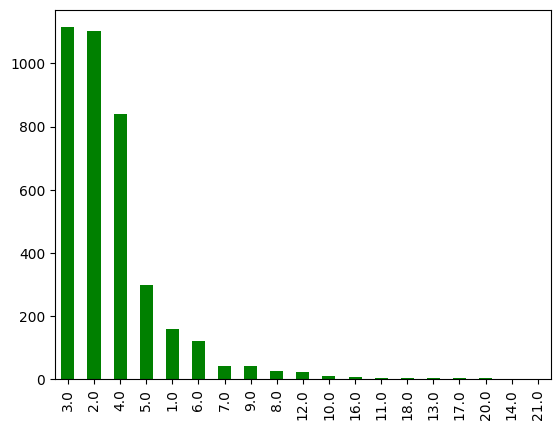

In [445]:
df['bathroom'].value_counts().plot(kind = 'bar', color = 'green')

#Balcony

<Axes: >

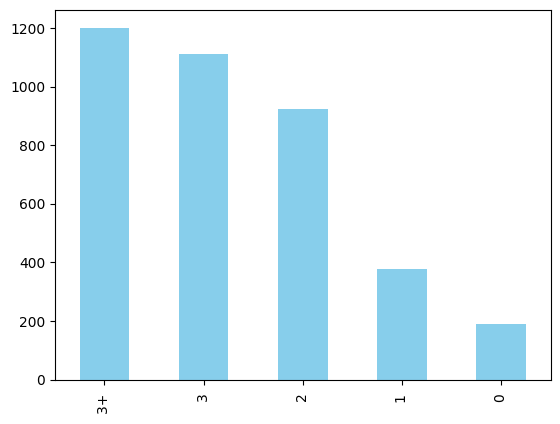

In [446]:
df['balcony'].value_counts().plot(kind = 'bar', color = 'skyblue')

#floorNum

In [447]:
df['floorNum'].describe()

count    3786.000000
mean        6.804543
std         6.028584
min        -1.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: >

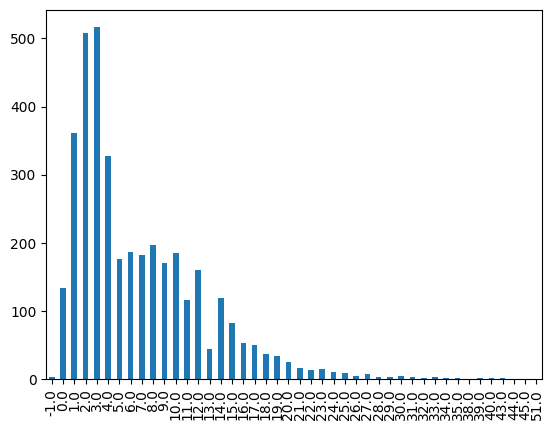

In [448]:
df['floorNum'].value_counts().sort_index().plot(kind = 'bar')

<Axes: xlabel='floorNum'>

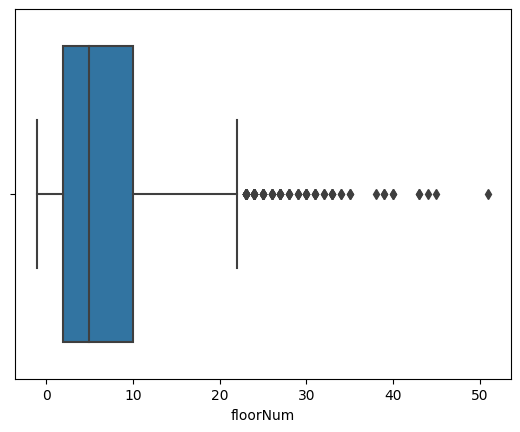

In [449]:
sns.boxplot(x = df['floorNum'])

Majority of the flats are between ground to 20 floors with GROUND TO 4TH floor are most common

#facing

In [450]:
df['facing'].isna().sum()

1108

In [451]:
df['facing'].fillna('NA', inplace =True)

<Axes: >

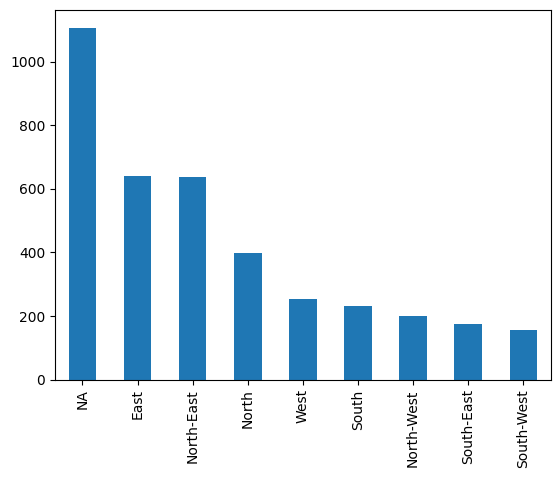

In [452]:
df['facing'].value_counts().plot(kind = 'bar')

#agePossesion

<Axes: >

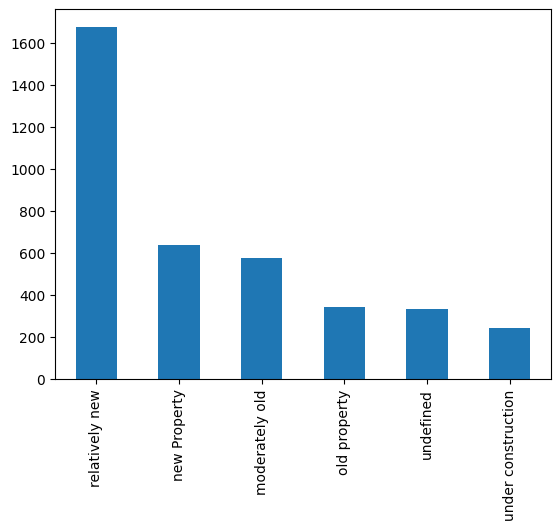

In [453]:
df['agePossession'].value_counts().plot(kind = 'bar')

most of the properties are relatively new property

#area

In [454]:
df['super_built_up_area'].isna().sum()

1894

In [455]:
df['super_built_up_area'].describe()

count    1911.000000
mean     1926.228804
std       762.666630
min       324.962141
25%      1467.496306
50%      1828.033137
75%      2214.995342
max      9999.986017
Name: super_built_up_area, dtype: float64

In [456]:
df['super_built_up_area'].skew(), df['super_built_up_area'].kurt()

(1.873604778087978, 10.302940430503877)

<Axes: xlabel='super_built_up_area', ylabel='Count'>

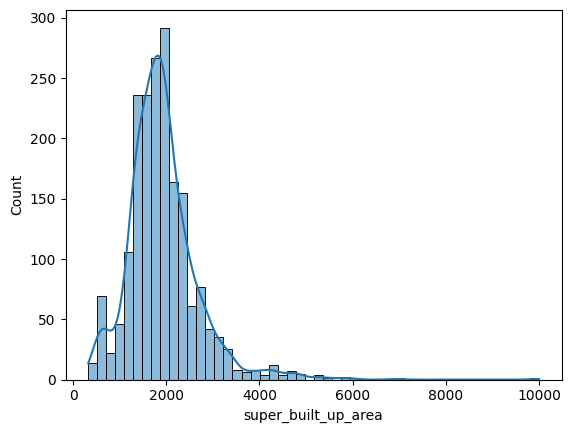

In [457]:
sns.histplot(df['super_built_up_area'].dropna(), kde = True, bins = 50)

<Axes: xlabel='super_built_up_area'>

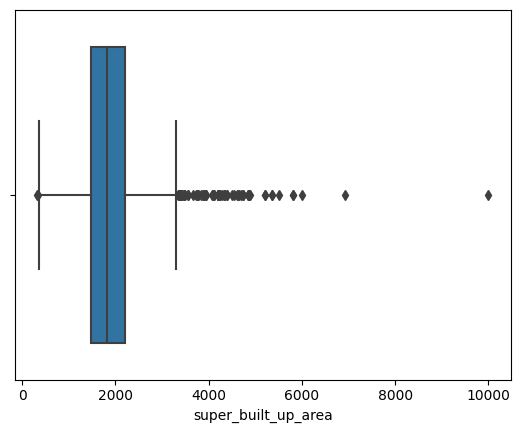

In [458]:
sns.boxplot(x = df['super_built_up_area'].dropna())

<Axes: >

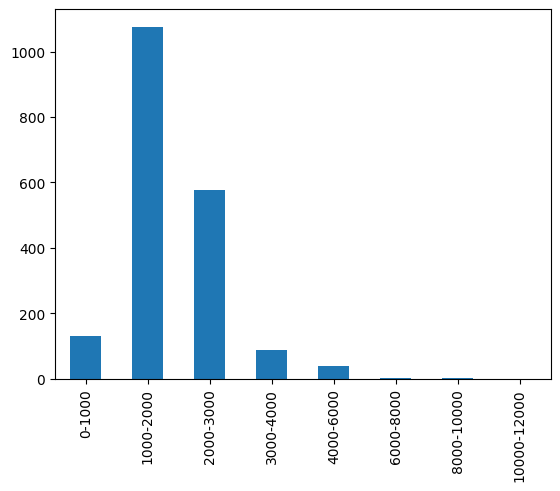

In [459]:
bins = [0,1000,2000,3000,4000,6000,8000,10000,12000]
bins_label = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-6000', '6000-8000', '8000-10000', '10000-12000']
pd.cut(df['super_built_up_area'].dropna(), bins = bins, labels = bins_label).value_counts().sort_index().plot(kind = 'bar')

In [460]:
Q1 = df['super_built_up_area'].describe()['25%']
Q3 = df['super_built_up_area'].describe()['75%']
IQR = Q3-Q1
IQR
upper = Q3+1.5*IQR
df['super_built_up_area'][df['super_built_up_area'] > upper].describe()

count      84.000000
mean     4198.019870
std       979.302780
min      3350.048597
25%      3434.007017
50%      4011.005876
75%      4617.740010
max      9999.986017
Name: super_built_up_area, dtype: float64

In [461]:
upper

3336.2438952500006

* Majority of flats have super built up area between 1000 to 3000 sq.ft
* Ther are some propeties which have super built up area above upper whisker in boxplot i.e  more than 3000 indicates outliers
* range of the outlierrs is 3350 to 10000

#builtup area

In [462]:
df['built_up_area'].isna().sum()

2635

In [463]:
df['built_up_area'].describe()

count      1170.000000
mean       2942.372382
std       21916.713313
min          30.000000
25%        1210.182500
50%        1650.000000
75%        2200.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: >

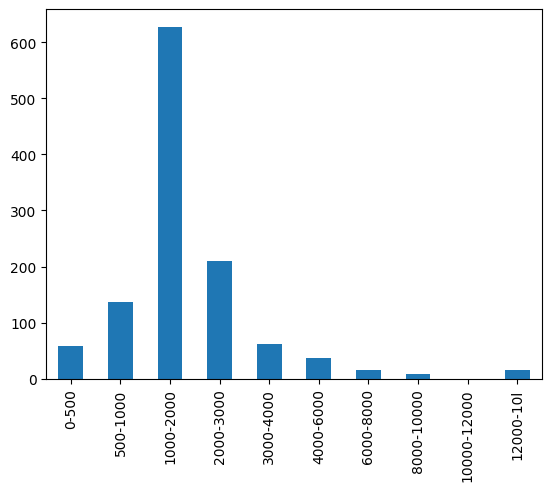

In [464]:
bins = [0,500,1000,2000,3000,4000,6000,8000,10000,12000,1000000]
bins_label = ['0-500', '500-1000', '1000-2000', '2000-3000', '3000-4000', '4000-6000', '6000-8000', '8000-10000', '10000-12000', '12000-10l']
pd.cut(df['built_up_area'].dropna(), bins = bins, labels = bins_label).value_counts().sort_index().plot(kind = 'bar')

In [465]:
Q1 = df['built_up_area'].describe()['25%']
Q3 = df['built_up_area'].describe()['75%']
IQR = Q3-Q1
IQR
upper = Q3+1.5*IQR
lower = Q1-1.5*IQR
df['built_up_area'][(df['built_up_area'] < lower) | (df['built_up_area'] > upper)].describe()

count        96.000000
mean      17740.166667
std       75260.509954
min        3690.000000
25%        4500.000000
50%        5200.000000
75%        8071.500000
max      737147.000000
Name: built_up_area, dtype: float64

In [466]:
lower,upper


(-274.5437500000003, 3684.72625)

<Axes: xlabel='built_up_area'>

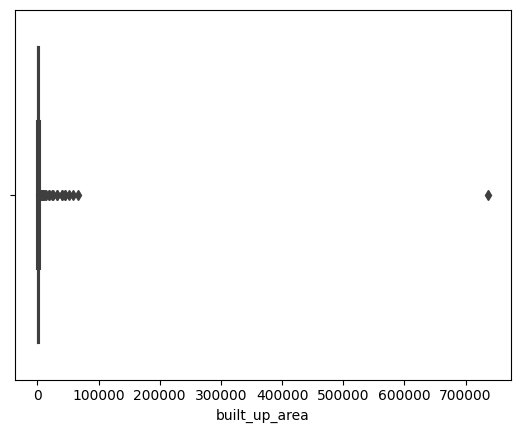

In [467]:
sns.boxplot(x = df['built_up_area'])

* Majority of the properties have the built up area between 500 to 3000
* There is property whoes builtup area is 30 which is not possible this might be an issue of unit convertion
* Also there are some properties whoes area is exceptionally large i.e 737147 this might be because of property is entire building or whole comercial complex is listed or there mmight be a data error

#Carpet area

In [468]:
df['carpet_area'].describe()

count      1911.000000
mean       2723.497658
std       22745.248830
min          15.000000
25%         900.000000
50%        1340.000000
75%        1800.000000
max      607936.000000
Name: carpet_area, dtype: float64

simillar to built up area carpet area also have same issues

In [469]:
df.sample(1)

,society,price,sector,price_per_sqft,area,property_type,areaWithType,super_built_up_area,built_up_area,carpet_area,...,floorNum,facing,agePossession,servant room,pooja room,study room,others,store room,furnishing_type,luxary_score
2969,m3m heights,2.65,sector 65,18492.0,1433.0,flat,Super Built up area 1433(133.13 sq.m.),1432.998007,NaN,NaN,...,4.0,North-East,new Property,0,0,1,0,0,1,15.0


#additionalRooms

In [470]:
add_room = df.iloc[:,-7:-2]

In [471]:
list(add_room.columns)

['servant room', 'pooja room', 'study room', 'others', 'store room']

In [472]:
add_room.head()

,servant room,pooja room,study room,others,store room
0,1,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,0


<Axes: ylabel='servant room'>

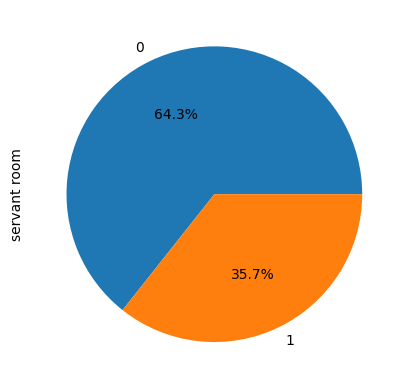

In [473]:
add_room['servant room'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

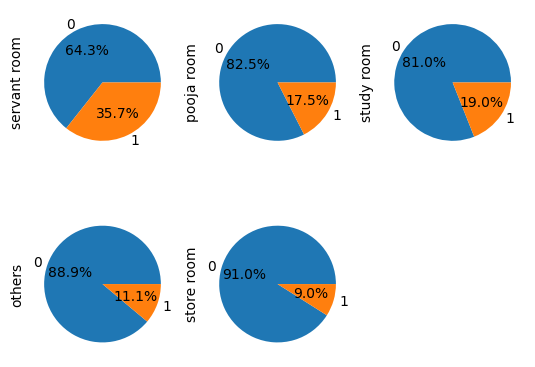

In [474]:

for idx, room in enumerate(list(add_room.columns), 1):
  plt.subplot(2,3,idx)
  add_room[room].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')



* 35.7% flats have servent room
* 17.5% flats have pooja room
* 19% flats have study room
* 11.1% flats have others room
* 9% flats have store room

<Axes: ylabel='furnishing_type'>

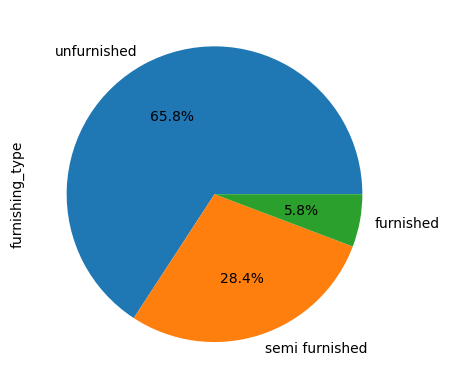

In [475]:
df['furnishing_type'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', labels = ['unfurnished', 'semi furnished', 'furnished'])

In [476]:
#2 = furnished
#0 = semi furnished
#1 = unfurnished

Most of the properties i.e around 66% properties are unfurnished

#Luxary score

In [477]:
df['luxary_score'].isna().sum()

94

In [478]:
df['luxary_score'].describe()

count    3711.000000
mean       70.787389
std        52.810017
min         0.000000
25%        31.000000
50%        58.000000
75%       109.000000
max       174.000000
Name: luxary_score, dtype: float64

<Axes: xlabel='luxary_score'>

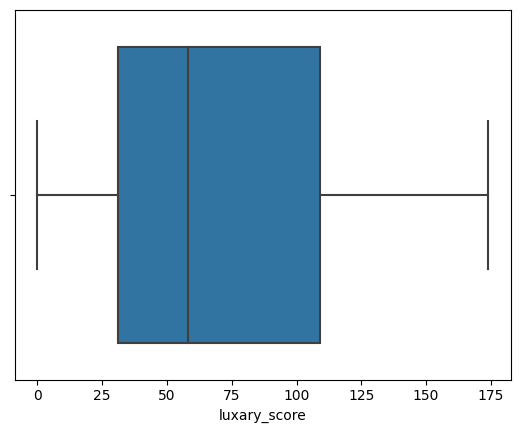

In [479]:
sns.boxplot(x = df['luxary_score'])

<Axes: >

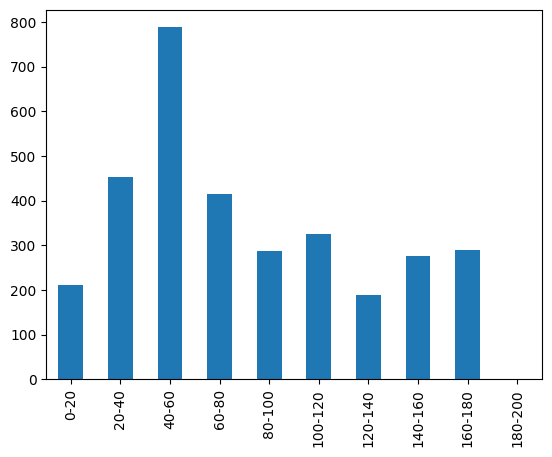

In [480]:
bins = [0,20,40,60,80,100,120,140,160,180,200]
bin_label = ['0-20','20-40','40-60','60-80','80-100','100-120','120-140','140-160','160-180','180-200']
pd.cut(df['luxary_score'].dropna(), bins = bins, labels = bin_label).value_counts().sort_index().plot(kind = 'bar')

we can see most of the properties have the luxary index between 40 to 60